In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [2]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

def tanh(t):
    return 2*sigmoid(t) - 1

In [3]:
df = pd.read_csv("df3.csv")
x = np.array(df.iloc[:, 2:])
y = np.array(df.chocolate)

ones = np.ones(x.shape[0])
X = np.column_stack((ones, x))
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

**Sigmoid Cost Function**
$$g(\mathbf{w}) = -\frac{1}{N}\sum^{N}_{i = 1}y_i\mathbf{w}^{T} \mathbf{x_i} - \log(1 + e^{\mathbf{w}^{T} \mathbf{x_i}})$$


In [4]:
def sigCostFunc(X, y, w):
    cost = 0
    for i in range(y.size):
        cost += y[i]*np.dot(w.T, X[i]) - np.log(1 + np.exp(np.dot(w.T, X[i])))
    return -cost/y.size

**tanh Cost Function**
$$g(\mathbf w) = \frac{1}{N}\sum^N_{i = 1}\log \left(1 +e^{ -y_i\mathbf{w}^{T} \mathbf x_i}\right)$$

In [5]:
def tanhCostFunc(X, y, w):
    cost = 0
    for i in range(y.size):
        cost += np.log(1 + np.exp(-y[i]*np.dot(w.T, X[i])))
    return cost / y.size

## Get weights collection

In [6]:
def gradFunc(w, X, y, N):
    grad = 0
    for i in range(N):
        grad += (y[i] - sigmoid(np.dot(w.T, X[i]))) * X[i]
    return (-1/N) * grad

# Initialization
alpha = 2
w = np.array([20.0]*X.shape[1])
N = y.size
iteration = 0
w_collect_0 = [w]
for i in range(10000):
    gradient = gradFunc(w, X, y, N)
    w = w - alpha * gradient
    w_collect_0.append(w)
    iteration += 1

w_collect_0[-1]

array([-357.47119236, -702.07056024,   -2.15268563,   47.16063836,
        -70.2471552 ,  162.9184082 , -145.03840348,  219.27776525,
        -74.69398925,  -38.73399013,   37.41226852,   11.28561693])

In [7]:
sigCostDec = []
for i in range(len(w_collect_0)):
    cost = sigCostFunc(X, y, w_collect_0[i])
    sigCostDec.append(cost)
sigCostDec[-1]

inf

In [8]:
y_new = np.where(y == 0, -1, y)

def tanhgrad(w, X, y):
    grad = 0
    for i in range(y.size):
        grad += sigmoid(-y[i] * np.dot(w.T, X[i])) * y[i] * X[i].T
    return (-1/y.size)*grad

# Initialization
alpha = 2
w = np.array([20.0]*X.shape[1])
iteration = 0
w_collect_1 = [w]
for i in range(10000):
    gradient = tanhgrad(w, X, y_new)
    w = w - alpha * gradient
    w_collect_1.append(w)
    iteration += 1

w_collect_1[-1]

array([-357.65262093, -702.29988055,   -2.21359628,   46.9188939 ,
        -70.28105728,  162.07304141, -145.28815798,  218.98541513,
        -74.64004623,  -38.49721198,   37.28258678,   10.6342932 ])

In [9]:
tanhCostDec = []
for i in range(len(w_collect_1)):
    cost = tanhCostFunc(X, y_new, w_collect_1[i])
    tanhCostDec.append(cost)
tanhCostDec[-1]

14.81981305019088

In [10]:
y_hat = sigmoid(np.dot(w_collect_0[-1].T, X.T))
y_hat = np.where(y_hat >= 0.5, 1, 0)

y_hat_1 = tanh(np.dot(w_collect_1[-1].T, X.T))
y_hat_1 = np.where(y_hat_1 >= 0, 1, -1)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(X, y)
y_sci = clf.predict(X)


In [12]:
fpr, tpr, threshold = roc_curve(y, y_hat)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, threshold1 = roc_curve(y_new, y_hat_1)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold = roc_curve(y, y_sci)
roc_auc2 = auc(fpr2, tpr2)


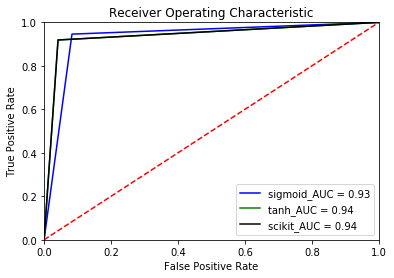

In [13]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'sigmoid_AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'tanh_AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'black', label = 'scikit_AUC = %0.2f' % roc_auc2)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()